# Network-wide Traffic Forecasting based on Inductive Loop Detection

# 1.表格处理

## 1.1 pandas读入数据
loop_20150101_20151231.csv读入并取名为df_speed，parse_dates=True 启动时序分析，   
Cabinet Location Information.csv读入并取名为cab

In [1]:
import pandas as pd

df_speed = pd.read_csv("loop_20150101_20151231.csv",  header=None, parse_dates=True)
df_speed.columns = ['date','id', 'direction', 'avg_speed', 'count', 'ratio']
print(df_speed.shape)   
df_speed.head()

(22211424, 6)


,date,id,direction,avg_speed,count,ratio
0,2015-01-01 00:00:00.000,005es15036,d,61.939138,20,0.019345
1,2015-01-01 00:00:00.000,005es15036,i,63.140194,14,0.012163
2,2015-01-01 00:00:00.000,005es15125,i,62.616388,6,0.502598
3,2015-01-01 00:00:00.000,005es15214,i,62.069070,15,0.008918
4,2015-01-01 00:00:00.000,005es15280,d,60.786423,18,0.017343


In [2]:
cab = pd.read_csv("Cabinet Location Information.csv")
print(cab.shape)   
cab.head()

(606, 5)


,CabName,Lat,Lon,Route,Milepost
0,005es00045,47.609618,-122.331050,5,0.45
1,005es00066,47.612600,-122.330358,5,0.66
2,005es00088,47.615682,-122.329174,5,0.88
3,005es00141,47.622847,-122.328635,5,1.41
4,005es00182,45.642140,-122.661989,5,1.82


## 1.2 表格的连接
连接键匹配cab的数据，匹配上的添加对应列数据，没匹配上的列用NaN填充


In [3]:
df_long = df_speed.copy() # 保证原数据df_speed不被破坏
df_long = df_long.merge(cab, left_on="id", right_on="CabName", how="left")

print(df_long.shape)
df_long.head()

(22211424, 11)


,date,id,direction,avg_speed,count,ratio,CabName,Lat,Lon,Route,Milepost
0,2015-01-01 00:00:00.000,005es15036,d,61.939138,20,0.019345,005es15036,47.407357,-122.291933,5,150.36
1,2015-01-01 00:00:00.000,005es15036,i,63.140194,14,0.012163,005es15036,47.407357,-122.291933,5,150.36
2,2015-01-01 00:00:00.000,005es15125,i,62.616388,6,0.502598,005es15125,47.420110,-122.287168,5,151.25
3,2015-01-01 00:00:00.000,005es15214,i,62.069070,15,0.008918,005es15214,47.429205,-122.273921,5,152.14
4,2015-01-01 00:00:00.000,005es15280,d,60.786423,18,0.017343,005es15280,47.438363,-122.269351,5,152.80



表格处理完成,id和cab都匹配上了,两个表格完成了合并

# 2.分析部分

## 2.1 基于速度和地理信息的可视化

### 2.1.1 给定时间各个测量点的车速/车量分析


在完整数据集中，有速度数据的id点的位置，给定时间下，测速度的点的平均速度可视化

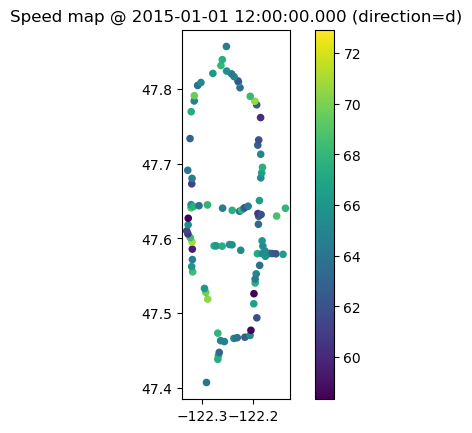

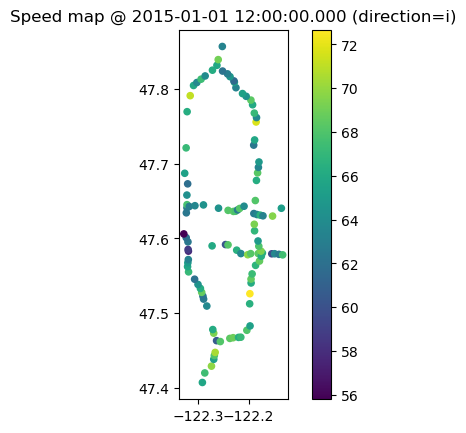

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

T = df_long["date"].unique()[144] # 改这里，加1代表多五分钟，最高是105119
df_T = df_long[df_long["date"] == T]
for dir_, group in df_T.groupby("direction"):
    gdf_dir = gpd.GeoDataFrame(group,
                               geometry=[Point(x, y) for x, y in zip(group.Lon, group.Lat)],
                               crs="EPSG:4326")
    gdf_dir.plot(column="avg_speed", cmap="viridis", markersize=20, legend=True)
    plt.title(f"Speed map @ {T} (direction={dir_})")
    plt.show()




在完整数据集中，有车量数据的id点的位置，给定时间下，测量点的通过车量可视化

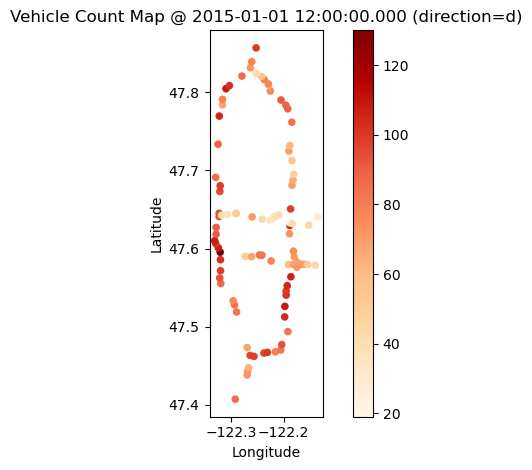

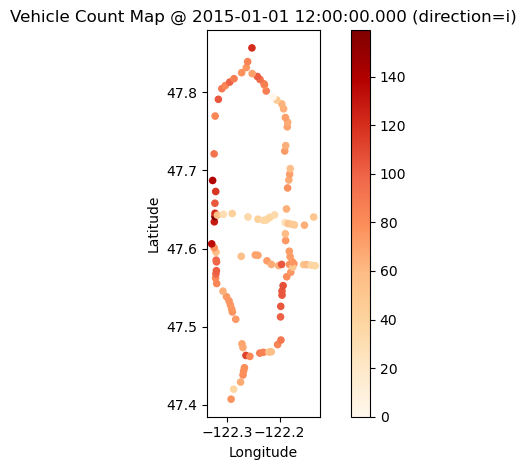

In [5]:
# 可视化给定时间各测量点的车辆通过数（count），按方向分开
for dir_, group in df_T.groupby("direction"):
    gdf_count = gpd.GeoDataFrame(
        group,
        geometry=[Point(x, y) for x, y in zip(group.Lon, group.Lat)],
        crs="EPSG:4326"
    )
    gdf_count.plot(
        column="count",
        cmap="OrRd",
        markersize=20,
        legend=True
    )
    plt.title(f"Vehicle Count Map @ {df_T['date'].iloc[0]} (direction={dir_})")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.tight_layout()
    plt.show()

### 2.1.2 各个id的测量点全年平均车速/车量分析

各个id的测量点全年平均车速

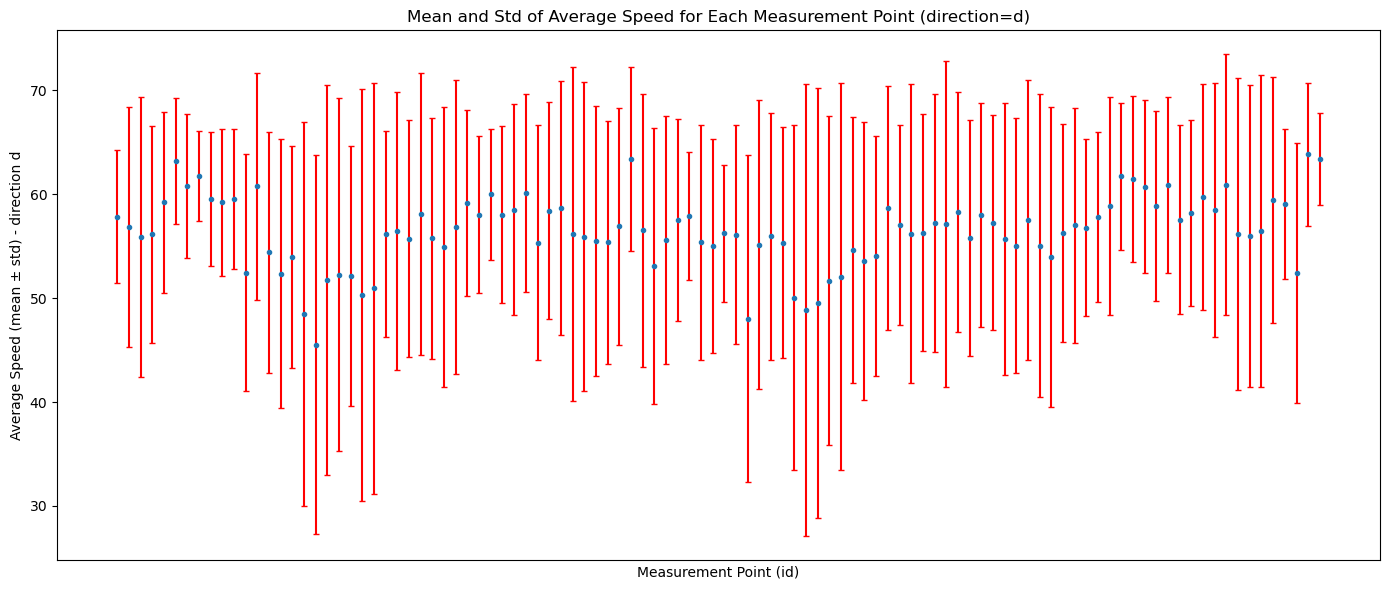

方向 d 有速度数据的测点数: 104
方向 d 有速度数据的测点编号：
['005es15036', '005es15280', '005es15315', '005es15348', '005es15531', '005es15892', '005es15957', '005es15996', '005es16186', '005es16237', '005es16302', '005es16396', '005es16466', '005es16513', '005es16551', '005es16583', '005es16640', '005es16701', '005es16802', '005es16831', '005es17025', '005es17075', '005es17162', '005es17460', '005es17722', '005es17826', '005es17875', '005es17976', '005es18017', '005es18156', '005es18262', '005es18322', '005es18449', '090es00278', '090es00302', '090es00353', '090es00430', '090es00453', '090es00545', '090es00720', '090es00769', '090es00838', '090es00859', '090es00893', '090es00961', '405es00011', '405es00044', '405es00139', '405es00171', '405es00243', '405es00294', '405es00342', '405es00473', '405es00608', '405es00700', '405es00803', '405es00840', '405es00890', '405es00975', '405es01079', '405es01128', '405es01178', '405es01229', '405es01392', '405es01465', '405es01508', '405es01563', '405es01612', '405es0174

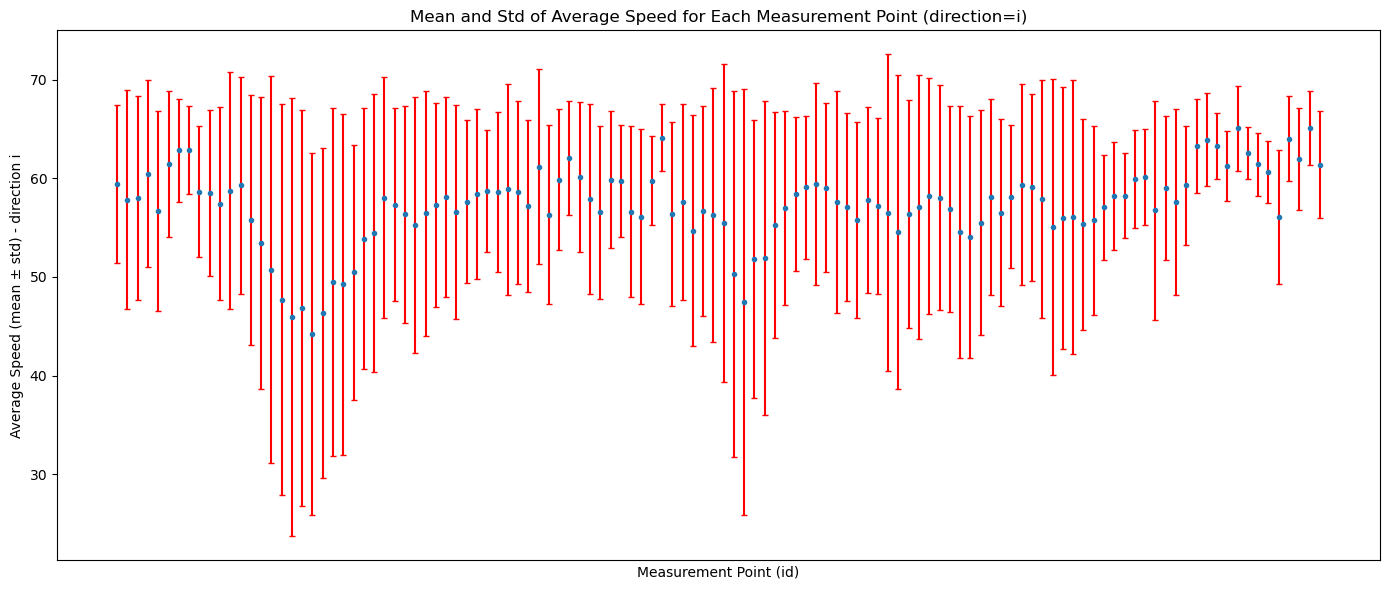

方向 i 有速度数据的测点数: 118
方向 i 有速度数据的测点编号：
['005es15036', '005es15125', '005es15214', '005es15280', '005es15315', '005es15348', '005es15531', '005es15569', '005es15821', '005es15892', '005es15920', '005es15957', '005es15996', '005es16040', '005es16097', '005es16186', '005es16237', '005es16272', '005es16302', '005es16377', '005es16395', '005es16466', '005es16513', '005es16551', '005es16756', '005es16802', '005es16831', '005es16920', '005es17025', '005es17131', '005es17375', '005es17722', '005es17875', '005es17976', '005es18017', '005es18066', '005es18115', '005es18204', '005es18264', '005es18322', '005es18449', '090es00302', '090es00430', '090es00454', '090es00549', '090es00595', '090es00667', '090es00696', '090es00769', '090es00805', '090es00893', '090es00921', '090es00961', '090es00996', '405es00011', '405es00044', '405es00139', '405es00171', '405es00221', '405es00243', '405es00342', '405es00391', '405es00608', '405es00700', '405es00803', '405es00840', '405es00890', '405es00975', '405es0103

In [6]:
stats = df_long.groupby("id")["avg_speed"].agg(['mean', 'std']).reset_index()


for direction in df_long['direction'].unique():
    stats_dir = df_long[df_long['direction'] == direction].groupby("id")["avg_speed"].agg(['mean', 'std']).reset_index()
    plt.figure(figsize=(14,6))
    plt.errorbar(stats_dir["id"], stats_dir["mean"], yerr=stats_dir["std"], fmt='o', ecolor='r', capsize=2, markersize=3)
    plt.xlabel("Measurement Point (id)")
    plt.ylabel(f"Average Speed (mean ± std) - direction {direction}")
    plt.title(f"Mean and Std of Average Speed for Each Measurement Point (direction={direction})")
    plt.xticks([], [])
    plt.tight_layout()
    plt.show()
    print(f"方向 {direction} 有速度数据的测点数: {stats_dir.shape[0]}")
    print(f"方向 {direction} 有速度数据的测点编号：")
    print(stats_dir["id"].tolist())

    

各个id的测量点全年平均车量

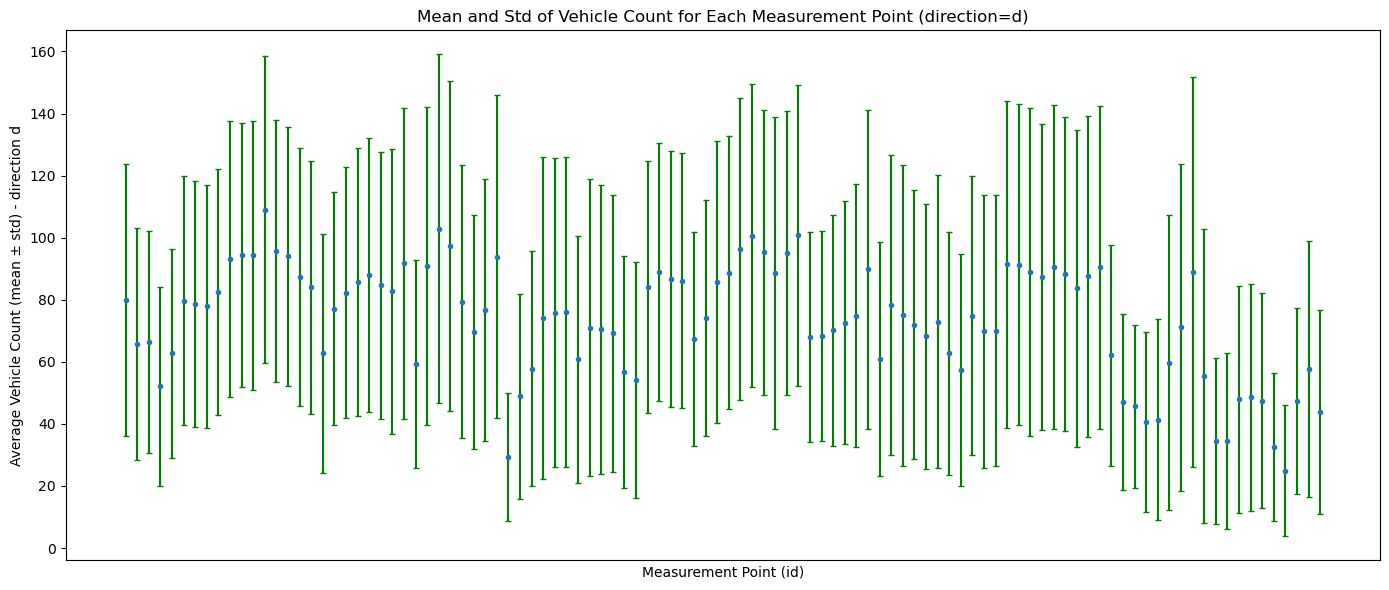

方向 d 有车量数据的测点数: 104
方向 d 有车量数据的测点编号：
['005es15036', '005es15280', '005es15315', '005es15348', '005es15531', '005es15892', '005es15957', '005es15996', '005es16186', '005es16237', '005es16302', '005es16396', '005es16466', '005es16513', '005es16551', '005es16583', '005es16640', '005es16701', '005es16802', '005es16831', '005es17025', '005es17075', '005es17162', '005es17460', '005es17722', '005es17826', '005es17875', '005es17976', '005es18017', '005es18156', '005es18262', '005es18322', '005es18449', '090es00278', '090es00302', '090es00353', '090es00430', '090es00453', '090es00545', '090es00720', '090es00769', '090es00838', '090es00859', '090es00893', '090es00961', '405es00011', '405es00044', '405es00139', '405es00171', '405es00243', '405es00294', '405es00342', '405es00473', '405es00608', '405es00700', '405es00803', '405es00840', '405es00890', '405es00975', '405es01079', '405es01128', '405es01178', '405es01229', '405es01392', '405es01465', '405es01508', '405es01563', '405es01612', '405es0174

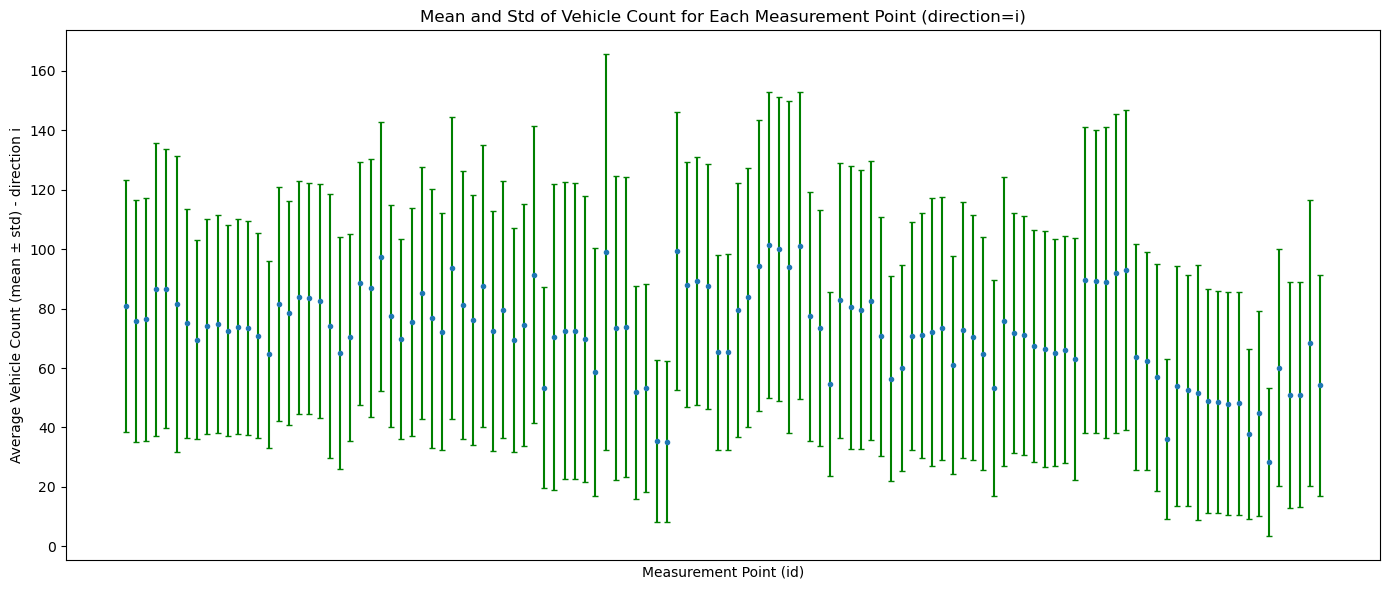

方向 i 有车量数据的测点数: 118
方向 i 有车量数据的测点编号：
['005es15036', '005es15125', '005es15214', '005es15280', '005es15315', '005es15348', '005es15531', '005es15569', '005es15821', '005es15892', '005es15920', '005es15957', '005es15996', '005es16040', '005es16097', '005es16186', '005es16237', '005es16272', '005es16302', '005es16377', '005es16395', '005es16466', '005es16513', '005es16551', '005es16756', '005es16802', '005es16831', '005es16920', '005es17025', '005es17131', '005es17375', '005es17722', '005es17875', '005es17976', '005es18017', '005es18066', '005es18115', '005es18204', '005es18264', '005es18322', '005es18449', '090es00302', '090es00430', '090es00454', '090es00549', '090es00595', '090es00667', '090es00696', '090es00769', '090es00805', '090es00893', '090es00921', '090es00961', '090es00996', '405es00011', '405es00044', '405es00139', '405es00171', '405es00221', '405es00243', '405es00342', '405es00391', '405es00608', '405es00700', '405es00803', '405es00840', '405es00890', '405es00975', '405es0103

In [7]:
for direction in df_long['direction'].unique():
    stats_count = df_long[df_long['direction'] == direction].groupby("id")["count"].agg(['mean', 'std']).reset_index()
    plt.figure(figsize=(14,6))
    plt.errorbar(stats_count["id"], stats_count["mean"], yerr=stats_count["std"], fmt='o', ecolor='g', capsize=2, markersize=3)
    plt.xlabel("Measurement Point (id)")
    plt.ylabel(f"Average Vehicle Count (mean ± std) - direction {direction}")
    plt.title(f"Mean and Std of Vehicle Count for Each Measurement Point (direction={direction})")
    plt.xticks([], [])
    plt.tight_layout()
    plt.show()
    print(f"方向 {direction} 有车量数据的测点数: {stats_count.shape[0]}")
    print(f"方向 {direction} 有车量数据的测点编号：")
    print(stats_count["id"].tolist())

### 2.1.3 车速/车量最大最小值和波动分析

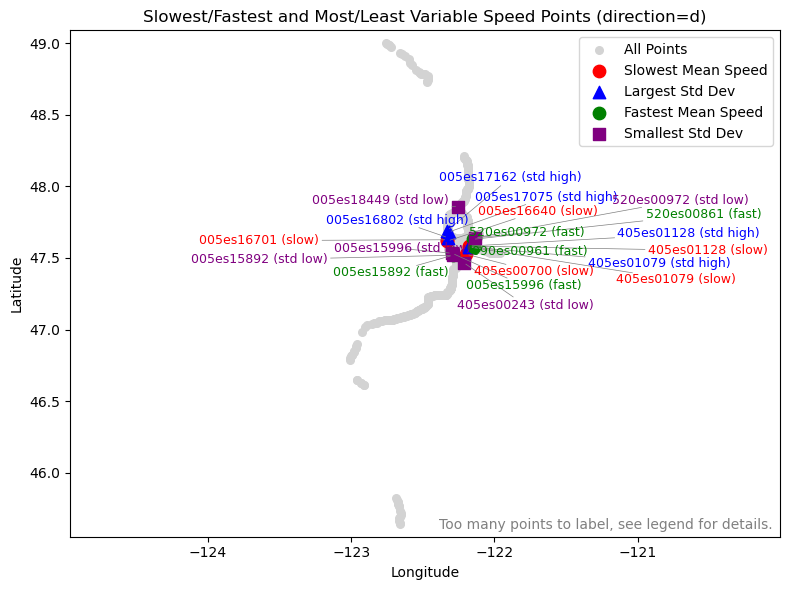

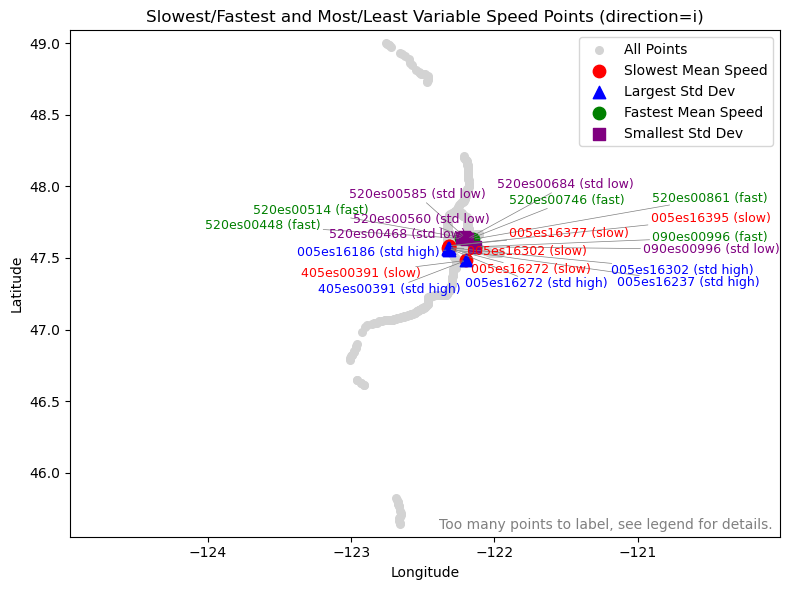

In [8]:
from adjustText import adjust_text


for dir_ in df_T['direction'].unique():
    stats_dir = df_long[df_long['direction'] == dir_].groupby("id")["avg_speed"].agg(['mean', 'std']).reset_index()
    slowest_ids = stats_dir.nsmallest(5, "mean")["id"].tolist()
    most_var_ids = stats_dir.nlargest(5, "std")["id"].tolist()
    fastest_ids = stats_dir.nlargest(5, "mean")["id"].tolist()
    least_var_ids = stats_dir.nsmallest(5, "std")["id"].tolist()

    slowest_points = cab[cab["CabName"].isin(slowest_ids)]
    most_var_points = cab[cab["CabName"].isin(most_var_ids)]
    fastest_points = cab[cab["CabName"].isin(fastest_ids)]
    least_var_points = cab[cab["CabName"].isin(least_var_ids)]

    fig, ax = plt.subplots(figsize=(8, 6))
    gdf_all = gpd.GeoDataFrame(cab, geometry=[Point(x, y) for x, y in zip(cab.Lon, cab.Lat)], crs="EPSG:4326")
    gdf_all.plot(ax=ax, color="lightgray", markersize=30, label="All Points")

    gpd.GeoDataFrame(slowest_points, geometry=[Point(x, y) for x, y in zip(slowest_points.Lon, slowest_points.Lat)], crs="EPSG:4326")\
        .plot(ax=ax, color="red", markersize=80, label="Slowest Mean Speed")
    gpd.GeoDataFrame(most_var_points, geometry=[Point(x, y) for x, y in zip(most_var_points.Lon, most_var_points.Lat)], crs="EPSG:4326")\
        .plot(ax=ax, color="blue", markersize=80, marker="^", label="Largest Std Dev")
    gpd.GeoDataFrame(fastest_points, geometry=[Point(x, y) for x, y in zip(fastest_points.Lon, fastest_points.Lat)], crs="EPSG:4326")\
        .plot(ax=ax, color="green", markersize=80, label="Fastest Mean Speed")
    gpd.GeoDataFrame(least_var_points, geometry=[Point(x, y) for x, y in zip(least_var_points.Lon, least_var_points.Lat)], crs="EPSG:4326")\
        .plot(ax=ax, color="purple", markersize=80, marker="s", label="Smallest Std Dev")

    plt.title(f"Slowest/Fastest and Most/Least Variable Speed Points (direction={dir_})")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    ax.set_aspect('equal', adjustable='datalim')
    plt.legend()
    plt.tight_layout()

    texts = []
    for _, row in slowest_points.iterrows():
        texts.append(ax.annotate(f"{row['CabName']} (slow)", (row["Lon"], row["Lat"]), color="red", fontsize=9))
    for _, row in most_var_points.iterrows():
        texts.append(ax.annotate(f"{row['CabName']} (std high)", (row["Lon"], row["Lat"]), color="blue", fontsize=9))
    for _, row in fastest_points.iterrows():
        texts.append(ax.annotate(f"{row['CabName']} (fast)", (row["Lon"], row["Lat"]), color="green", fontsize=9))
    for _, row in least_var_points.iterrows():
        texts.append(ax.annotate(f"{row['CabName']} (std low)", (row["Lon"], row["Lat"]), color="purple", fontsize=9))

    if len(texts) > 15:
        plt.text(0.99, 0.01, "Too many points to label, see legend for details.",
                 transform=ax.transAxes, ha="right", va="bottom", fontsize=10, color="gray")
    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
    plt.show()



## 2.2 基于相领测量点travel time的分析

In [9]:
import pandas as pd

In [10]:
# 1. 构造每条 loop 的基础信息：id, direction, Route, Milepost
loops = (
    df_long[["id","direction"]]
    .drop_duplicates()
    .merge(cab[["CabName","Route","Milepost"]],
           left_on="id", right_on="CabName",
           how="left")
)

# 2. 按 Route + direction 分组，生成 seg 表
segs = []
for (route, dir_), grp in loops.groupby(["Route","direction"]):
    # outbound (d) 我们按 Milepost 升序，inbound (i) 按降序——这样 shift(-1) 就正好拿到同一方向上的“下一个”loop
    asc = True if dir_ == "d" else False
    g = grp.sort_values("Milepost", ascending=asc).reset_index(drop=True)
    g["next_loop"] = g["id"].shift(-1)
    g["mp_start"]  = g["Milepost"]
    g["mp_end"]    = g["Milepost"].shift(-1)
    # 丢掉跨组产生的 NaN
    segs.append(g.dropna(subset=["next_loop"])[["id","direction","next_loop","mp_start","mp_end"]])

seg = pd.concat(segs, ignore_index=True).rename(columns={"id":"now_loop"})
# seg 列：[ now_loop, direction, next_loop, mp_start, mp_end ]

# 3. 合并速度数据，注意 on 上也要加 direction
df_seg = (
    df_long
    # 先合并起点 avg_speed -> speed_up
    .merge(seg, 
           left_on=["id","direction"], 
           right_on=["now_loop","direction"], 
           how="inner")
    # 再合并终点同方向的 avg_speed -> speed_down
    .merge(
        df_long[["date","id","direction","avg_speed"]]
        .rename(columns={"id":"next_loop","avg_speed":"speed_down"}),
        on=["date","next_loop","direction"],
        how="left"
    )
)

# 4. 计算 distance 和 travel_time_min
df_seg["distance"] = df_seg["mp_end"] - df_seg["mp_start"]
df_seg["travel_time_min"] = (
    df_seg["distance"] 
    / ((df_seg["avg_speed"] + df_seg["speed_down"]) / 2)
    * 60
)

# 5. 丢掉无法计算 travel_time 的
n_before = len(df_seg)
df_seg = df_seg.dropna(subset=["travel_time_min"]).reset_index(drop=True)
n_after  = len(df_seg)
print(f"去除无法计算travel_time的行数: {n_before-n_after}")

# 6. 增加 segment 列
df_seg["segment"] = df_seg["now_loop"] + "→" + df_seg["next_loop"]

# 检查一下
print(df_seg.columns.tolist())
df_seg.tail()


去除无法计算travel_time的行数: 841536
['date', 'id', 'direction', 'avg_speed', 'count', 'ratio', 'CabName', 'Lat', 'Lon', 'Route', 'Milepost', 'now_loop', 'next_loop', 'mp_start', 'mp_end', 'speed_down', 'distance', 'travel_time_min', 'segment']


,date,id,direction,avg_speed,count,ratio,CabName,Lat,Lon,Route,Milepost,now_loop,next_loop,mp_start,mp_end,speed_down,distance,travel_time_min,segment
20617339,2015-11-09 23:35:00.000,405es02953,i,62.160007,19,0.012909,405es02953,47.824013,-122.252212,405,29.53,405es02953,405es02951,29.53,29.51,65.082815,-0.02,-0.018862,405es02953→405es02951
20617340,2015-11-09 23:40:00.000,405es02953,i,63.844011,17,0.009556,405es02953,47.824013,-122.252212,405,29.53,405es02953,405es02951,29.53,29.51,65.082815,-0.02,-0.018615,405es02953→405es02951
20617341,2015-11-09 23:45:00.000,405es02953,i,64.295778,24,0.016464,405es02953,47.824013,-122.252212,405,29.53,405es02953,405es02951,29.53,29.51,65.082815,-0.02,-0.018550,405es02953→405es02951
20617342,2015-11-09 23:50:00.000,405es02953,i,65.057682,24,0.013520,405es02953,47.824013,-122.252212,405,29.53,405es02953,405es02951,29.53,29.51,65.082815,-0.02,-0.018442,405es02953→405es02951
20617343,2015-11-09 23:55:00.000,405es02953,i,59.189824,24,0.014613,405es02953,47.824013,-122.252212,405,29.53,405es02953,405es02951,29.53,29.51,65.082815,-0.02,-0.019312,405es02953→405es02951


### 2.2.1 segment的距离分布和travel_time分布可视化

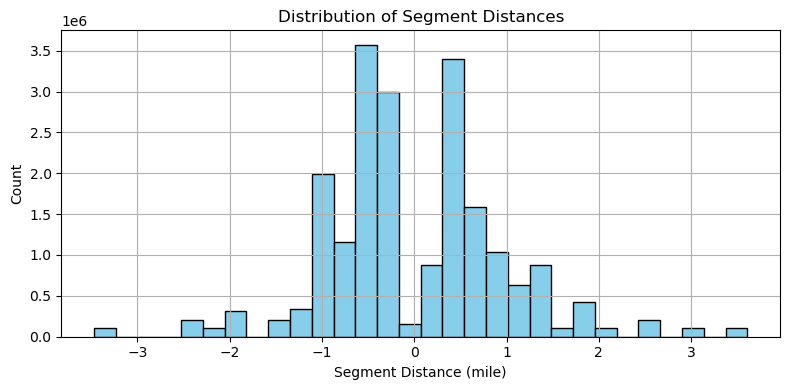

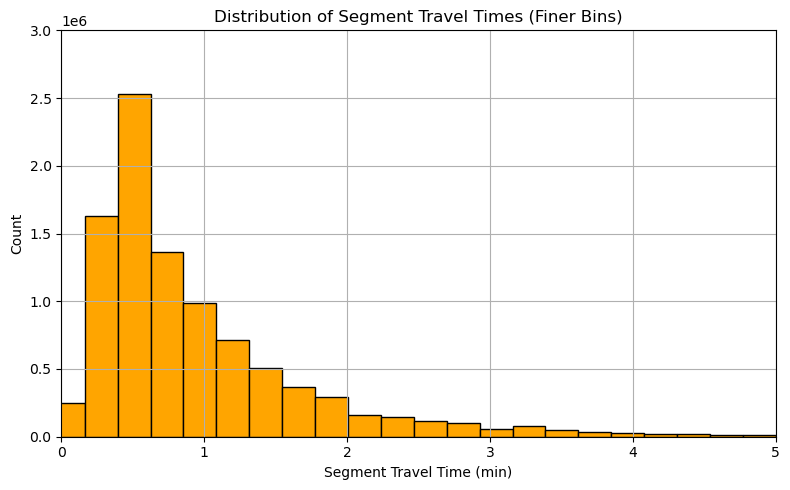

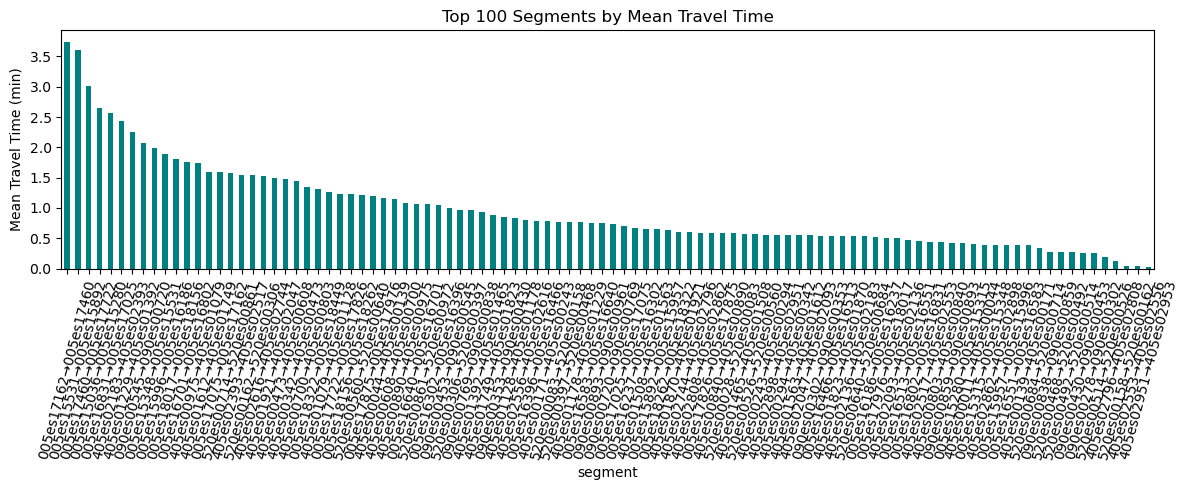

In [11]:
import matplotlib.pyplot as plt

# 路段距离分布
plt.figure(figsize=(8, 4))
df_seg["distance"].hist(bins=30, color="skyblue", edgecolor="k")
plt.xlabel("Segment Distance (mile)")
plt.ylabel("Count")
plt.title("Distribution of Segment Distances")
plt.tight_layout()
plt.show()


# 路段旅行时间分布
plt.figure(figsize=(8, 5))
df_seg["travel_time_min"].hist(bins=500, color="orange", edgecolor="k")
# 调整travel_time直方图的横坐标粒度（如bins=60）
plt.xlim(0, 5)
plt.ylim(0, 3e6)
plt.xlabel("Segment Travel Time (min)")
plt.ylabel("Count")
plt.title("Distribution of Segment Travel Times (Finer Bins)")
plt.tight_layout()
plt.show()

# 按segment分组，画出每个segment的平均travel_time
mean_tt = df_seg.groupby("segment")["travel_time_min"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
mean_tt.head(100).plot(kind="bar", color="teal")
plt.ylabel("Mean Travel Time (min)")
plt.title("Top 100 Segments by Mean Travel Time")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

### 2.2.2 基于travel time的道路拥堵和异常值（车祸检查）


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from tqdm import tqdm

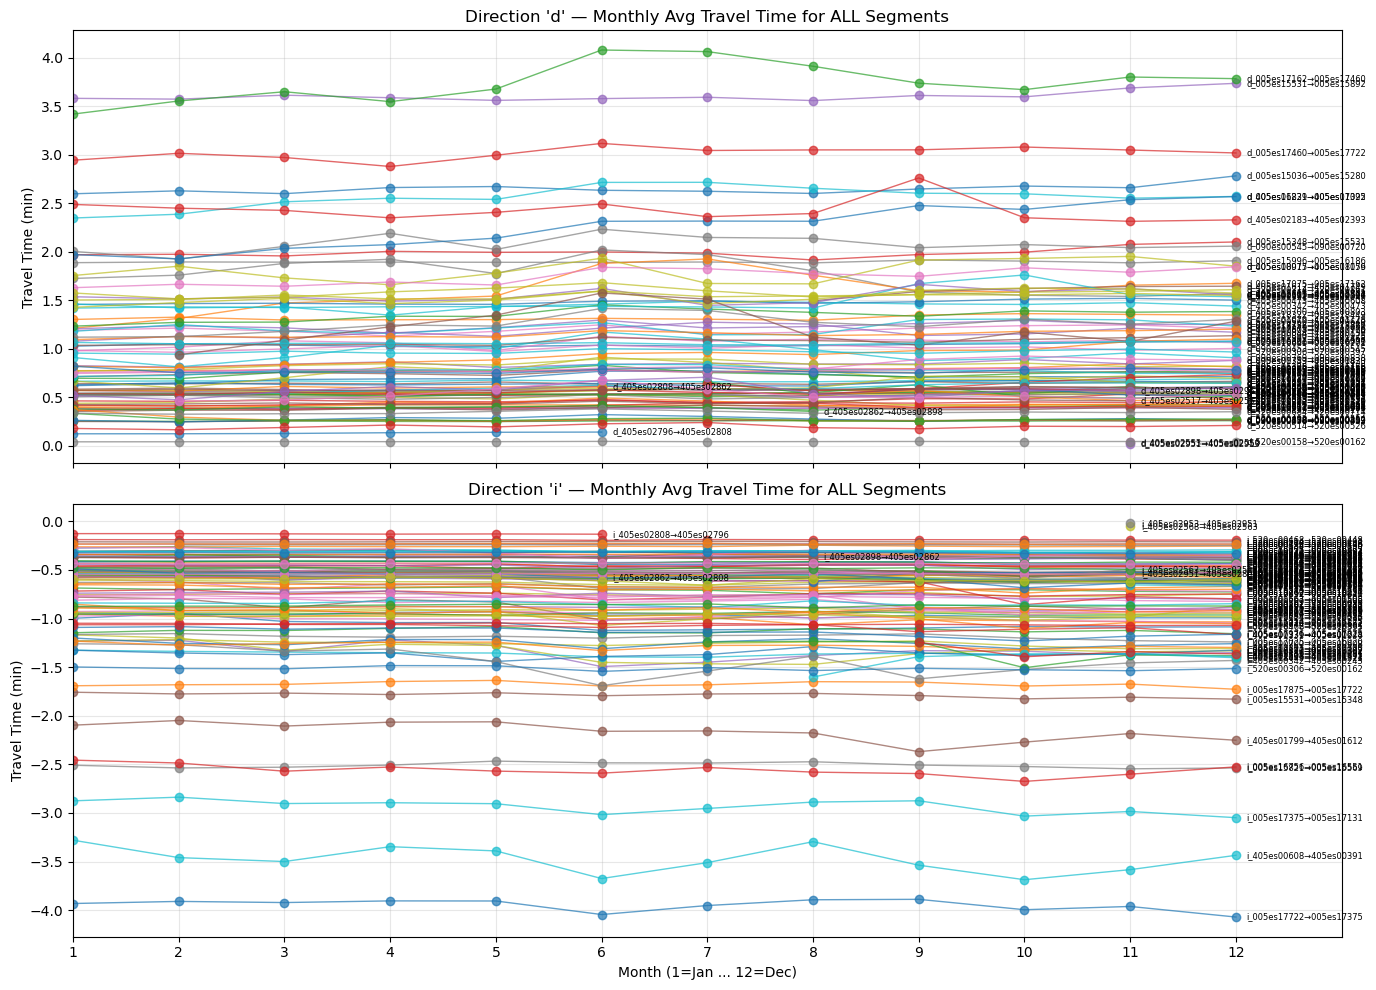

Detecting anomalies for direction i: 100%|██████████| 114/114 [00:30<00:00,  3.76it/s]


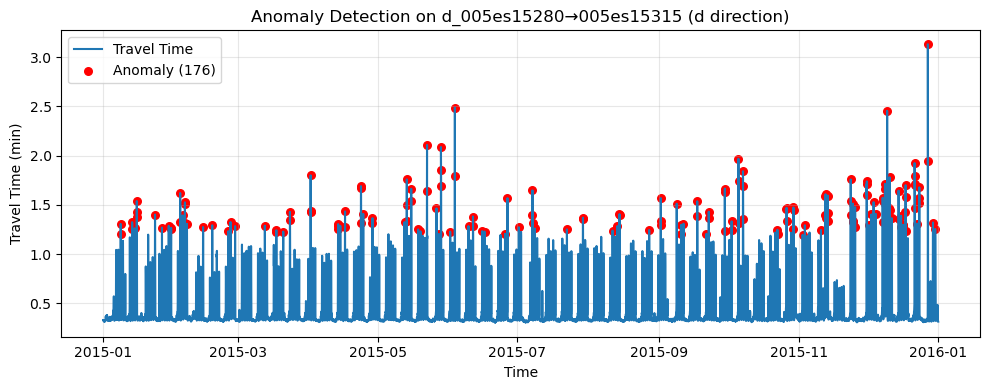

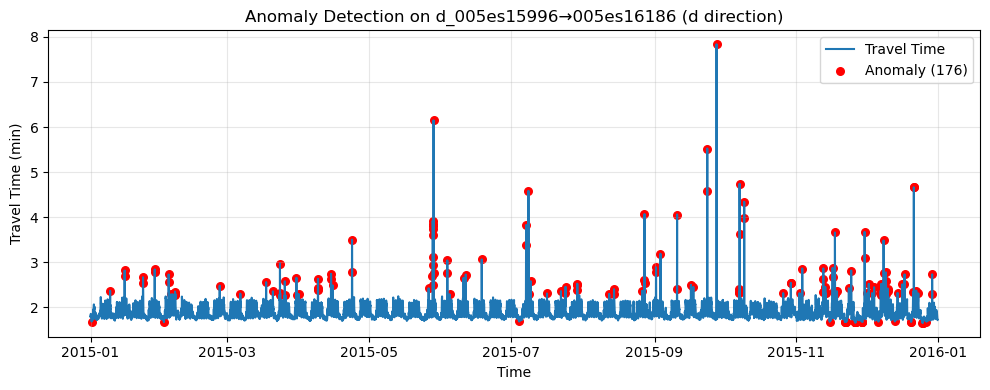

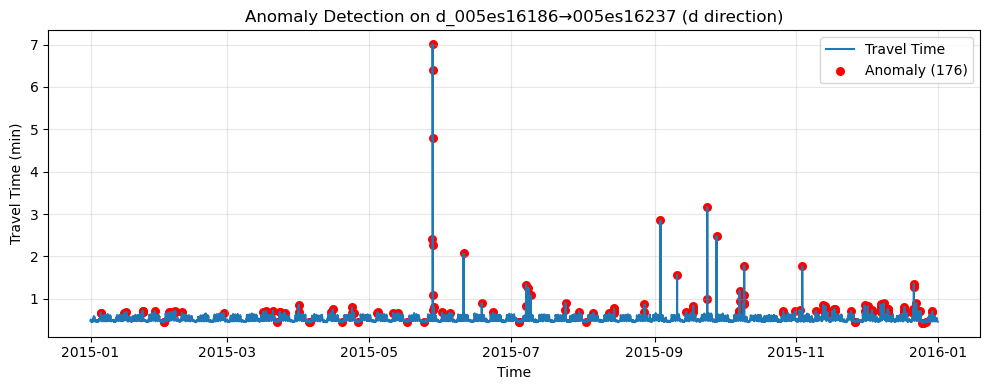

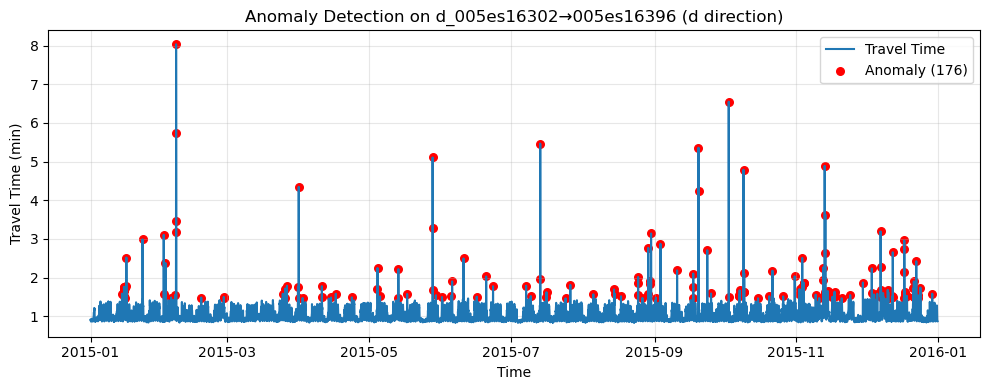

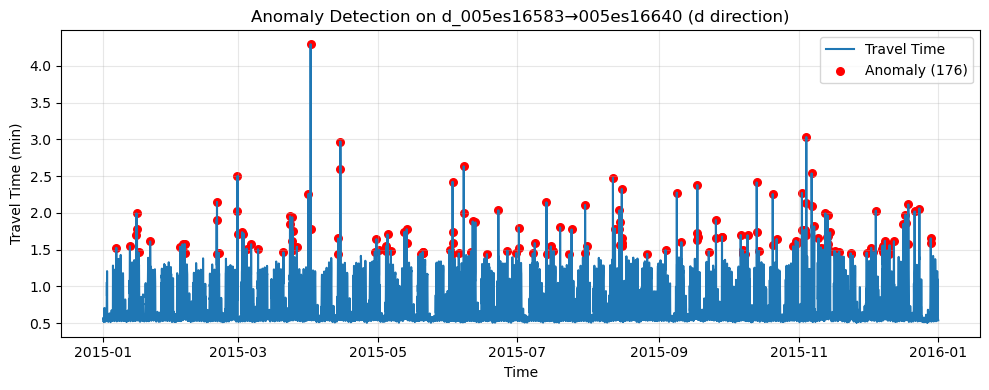

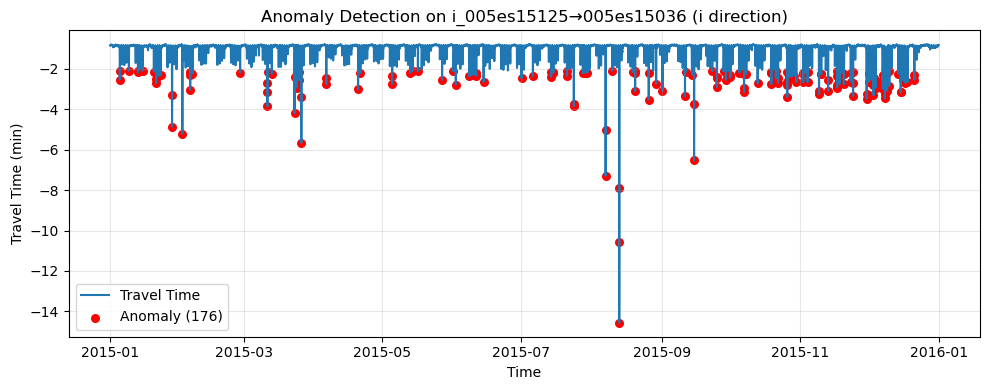

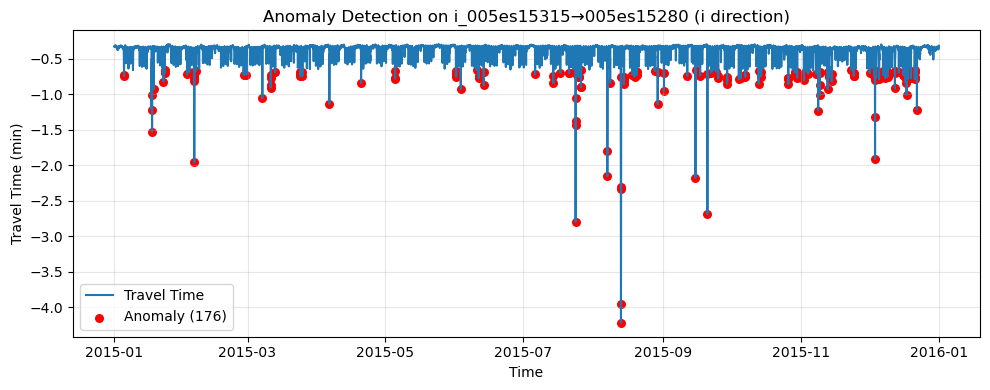

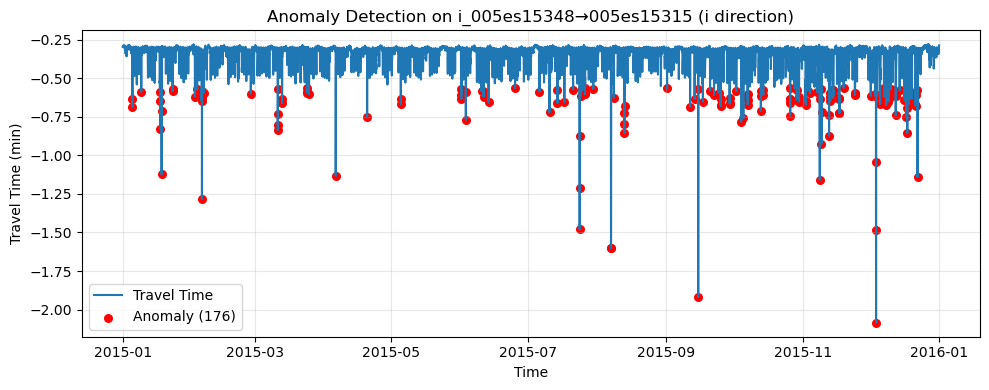

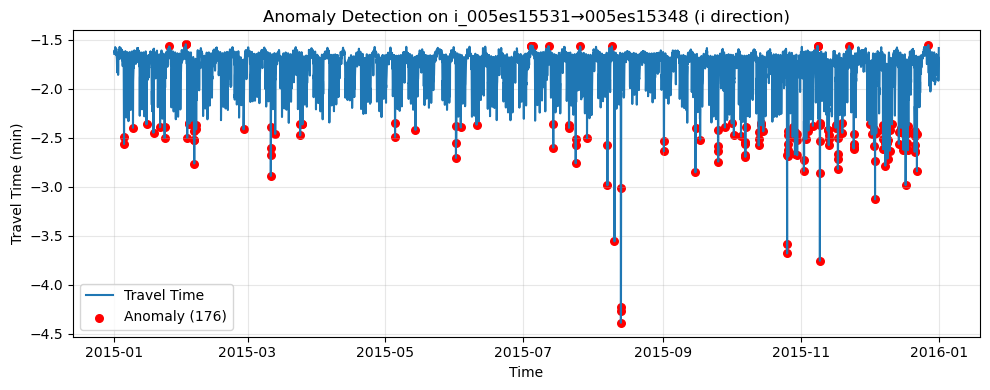

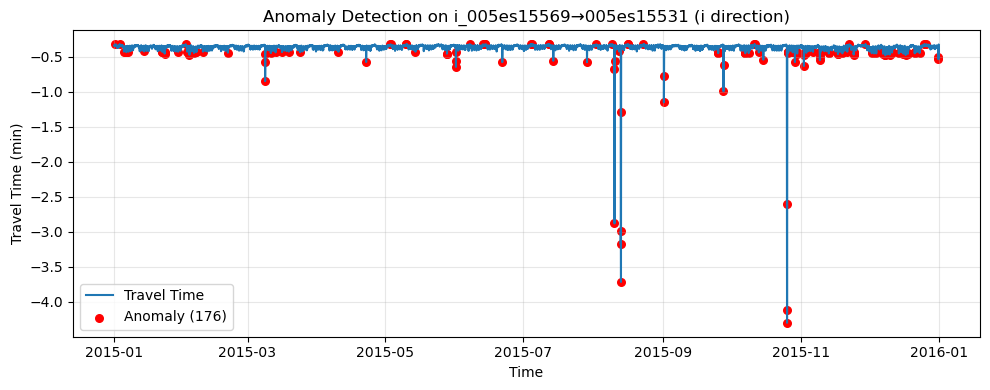

In [13]:
# 0. 拷一份不改原表
df = df_seg.copy()

# 1. 确保 date 是 datetime
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])

# 2. 构造方向敏感的 seg_id
df['seg_id'] = df['direction'] + '_' + df['now_loop'] + '→' + df['next_loop']

# 3. 添加月、时字段
df['month'] = df['date'].dt.month
df['hour']  = df['date'].dt.hour

# —— A. 月度平均 travel_time（所有 seg_id） —— #
monthly = (
    df
    .groupby(['direction','seg_id','month'], as_index=False)['travel_time_min']
    .mean()
)

directions = sorted(df['direction'].unique())
fig, axes = plt.subplots(len(directions), 1, figsize=(14, 5*len(directions)), sharex=True)

for ax, d in zip(axes, directions):
    sub = monthly[monthly['direction']==d]
    for seg, grp in sub.groupby('seg_id'):
        ax.plot(grp['month'], grp['travel_time_min'],
                marker='o', linewidth=1, alpha=0.7)
        # 在最后一个月打标签
        lm = grp['month'].max()
        lt = grp.loc[grp['month']==lm, 'travel_time_min'].values[0]
        ax.text(lm + 0.1, lt, seg, fontsize=6, va='center')
    ax.set_title(f"Direction '{d}' — Monthly Avg Travel Time for ALL Segments")
    ax.set_ylabel("Travel Time (min)")
    ax.grid(alpha=0.3)

axes[-1].set_xlabel("Month (1=Jan ... 12=Dec)")
plt.xlim(1, 13)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


# —— B. 小时级别异常检测（按方向） —— #
# 先做每小时聚合
hourly = (
    df.set_index('date')
      .groupby('seg_id')['travel_time_min']
      .resample('H')
      .mean()
      .dropna()
      .reset_index()
)

# 对每个方向分别检测
anoms_by_dir = {d: {} for d in directions}

for d in directions:
    sub = hourly[hourly['seg_id'].str.startswith(d + '_')]
    for seg, grp in tqdm(sub.groupby('seg_id'), desc=f"Detecting anomalies for direction {d}"):
        ts = grp.set_index('date')['travel_time_min']
        if len(ts) < 24:
            continue
        iso = IsolationForest(contamination=0.02, random_state=42)
        lbl = iso.fit_predict(ts.values.reshape(-1,1))
        times = ts.index[lbl == -1]
        if len(times):
            anoms_by_dir[d][seg] = times

# 分方向取 Top-5 异常最多的 seg_id 并画图
for d in directions:
    items = sorted(anoms_by_dir[d].items(), key=lambda x: len(x[1]), reverse=True)[:5]
    for seg, times in items:
        ts = hourly[hourly['seg_id']==seg].set_index('date')['travel_time_min']
        plt.figure(figsize=(10,4))
        plt.plot(ts.index, ts.values, label='Travel Time')
        plt.scatter(times, ts.loc[times],
                    color='red', s=30,
                    label=f'Anomaly ({len(times)})')
        plt.title(f"Anomaly Detection on {seg} ({d} direction)")
        plt.xlabel("Time")
        plt.ylabel("Travel Time (min)")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()


### 2.2.3 基于travel time聚类算法的道路拥堵评估

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/Users/xiexukang/environment/pythonenvironment/Seattle Inductive Loop Detector/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score = 0.500


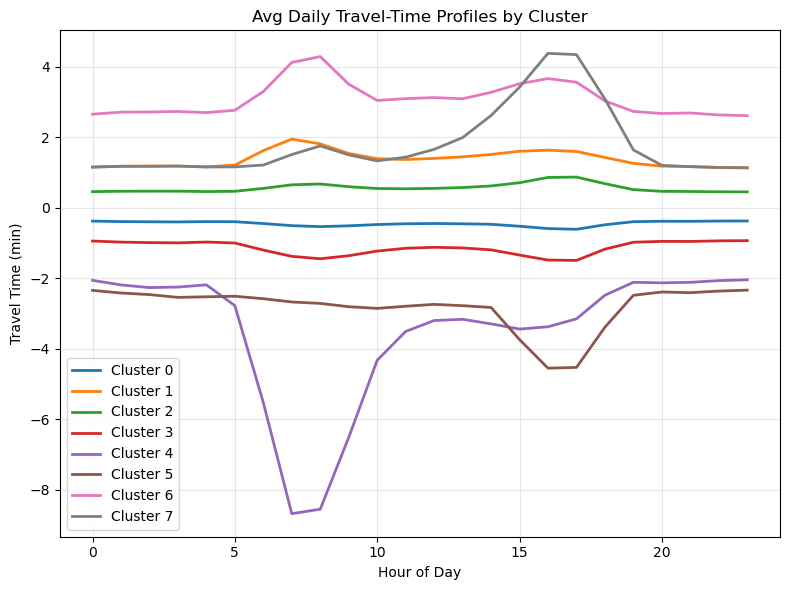

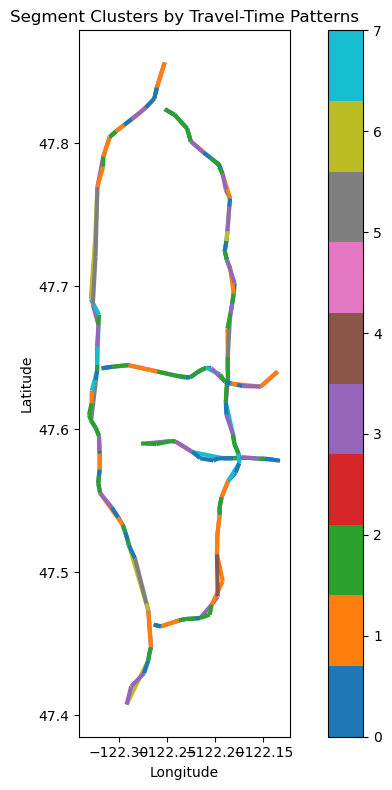

In [ ]:
# ——— 0. 确保 df_seg, cab 已经准备好 ———
# df_seg 列含：segment, now_loop, next_loop, mp_start, mp_end, date, travel_time_min, direction
# cab    列含：CabName, Lat, Lon

# 0.1 强制 date 为 datetime
df_seg['date'] = pd.to_datetime(df_seg['date'])

# ——— 1. 构造段几何表 seg_geo ———
seg_geo = (
    df_seg[
      ['segment','now_loop','next_loop','direction','mp_start','mp_end']
    ]
    .drop_duplicates()
    .reset_index(drop=True)
)

# 1.1 节点经纬度
nodes = cab.rename(columns={'CabName':'id'})[['id','Lat','Lon']]

# 1.2 起点坐标
seg_geo = (
    seg_geo
    .merge(nodes, left_on='now_loop', right_on='id')
    .rename(columns={'Lat':'lat0','Lon':'lon0'})
    .drop(columns='id')
)

# 1.3 终点坐标
seg_geo = (
    seg_geo
    .merge(nodes, left_on='next_loop', right_on='id')
    .rename(columns={'Lat':'lat1','Lon':'lon1'})
    .drop(columns='id')
)

# ——— 2. 特征构造 ———
# 2.1 小时特征
df_seg['hour'] = df_seg['date'].dt.hour
hourly = (
    df_seg
    .groupby(['segment','hour'], as_index=False)['travel_time_min']
    .mean()
    .pivot(index='segment', columns='hour', values='travel_time_min')
)
hourly = hourly.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)

# 2.2 统计特征
stats = (
    df_seg
    .groupby('segment')['travel_time_min']
    .agg(mean='mean', std='std', p90=lambda x: np.percentile(x,90))
)

# 2.3 合并特征矩阵
features = hourly.join(stats, how='inner')

# 2.4 把所有列名转成字符串，确保纯 str 类型
features.columns = features.columns.map(str)

# ——— 3. 聚类建模 ———
# 3.1 标准化
X = StandardScaler().fit_transform(features)  # 或者 .fit_transform(features.values)

# 3.2 KMeans
k = 8  # 你可以调整这个值
labels = KMeans(n_clusters=k, random_state=0).fit_predict(X)
features['cluster'] = labels

# 3.3 轮廓系数
score = silhouette_score(X, labels)
print(f"Silhouette Score = {score:.3f}")

# ——— 4. 可视化 ———
# 4.1 各簇日周期曲线
plt.figure(figsize=(8,6))
for c in range(k):
    avg_curve = hourly.loc[features['cluster']==c].mean(axis=0)
    plt.plot(avg_curve.index, avg_curve.values, linewidth=2, label=f'Cluster {c}')
plt.xlabel('Hour of Day')
plt.ylabel('Travel Time (min)')
plt.title('Avg Daily Travel-Time Profiles by Cluster')
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# 4.2 地图上画线段
# 4.2.1 合并聚类结果
seg_geo = seg_geo.merge(
    features[['cluster']],
    left_on='segment',
    right_index=True,
    how='inner'
)

# 4.2.2 构造几何
seg_geo['geometry'] = seg_geo.apply(
    lambda r: LineString([(r.lon0,r.lat0),(r.lon1,r.lat1)]),
    axis=1
)

# 4.2.3 GeoDataFrame 并画图
gdf = gpd.GeoDataFrame(seg_geo, geometry='geometry', crs="EPSG:4326")
ax = gdf.plot(
    column='cluster',
    cmap='tab10',
    linewidth=3,
    legend=True,
    figsize=(8,8)
)
ax.set_title("Segment Clusters by Travel-Time Patterns")
ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude")
plt.tight_layout(); plt.show()


### 2.2.4 利用 XGBoost 回归模型进行短时（小时级）出行时间预测


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error
import xgboost as xgb

Top3 最慢路段： ['d_005es17162→005es17460', 'd_005es15531→005es15892', 'd_005es17460→005es17722']
                    seg_id                date  travel_time_min
0  d_005es15531→005es15892 2015-01-01 00:00:00         3.386715
1  d_005es15531→005es15892 2015-01-01 01:00:00         3.392186
2  d_005es15531→005es15892 2015-01-01 02:00:00         3.360995
3  d_005es15531→005es15892 2015-01-01 03:00:00         3.380129
4  d_005es15531→005es15892 2015-01-01 04:00:00         3.382859
d_005es17162→005es17460 RMSE=1.320


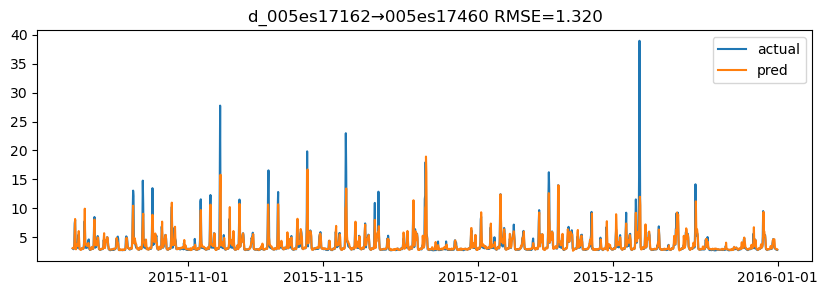

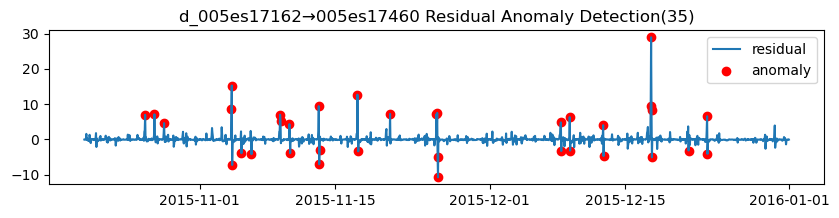

d_005es15531→005es15892 RMSE=0.424


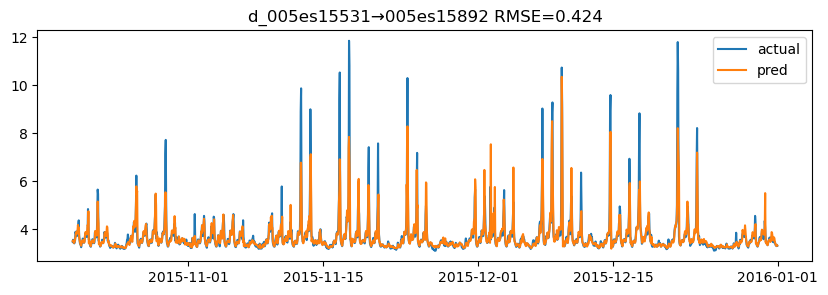

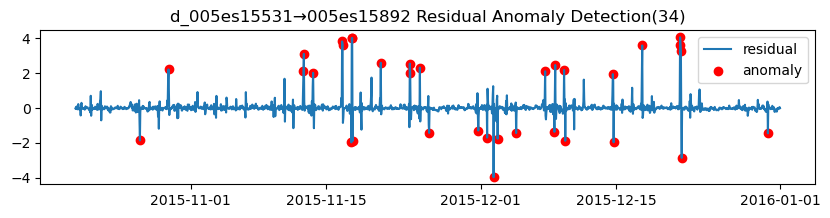

d_005es17460→005es17722 RMSE=0.525


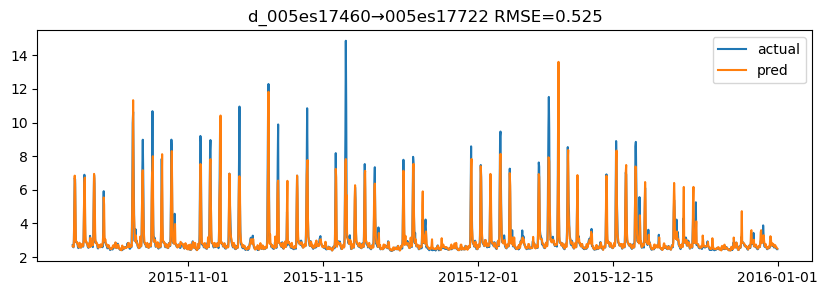

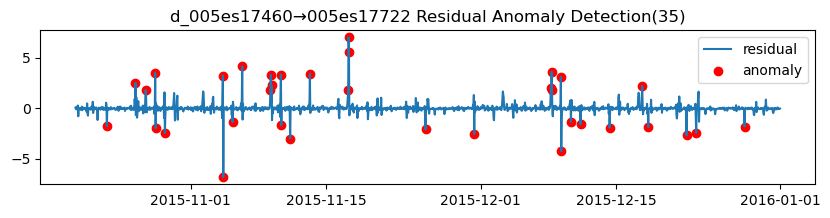

In [45]:
# 假设 df_seg 已经生成好 travel_time_min 等列
df = df_seg.copy()
df['date'] = pd.to_datetime(df['date'])
df['seg_id'] = df['direction'] + '_' + df['now_loop'] + '→' + df['next_loop']

#——— 1) 先算出 Top-N 最慢路段，只对它们做后续聚合 ———
# 平均 travel_time_min 排序
mean_tt_all = df.groupby('seg_id')['travel_time_min'].mean()
top_seg_ids = mean_tt_all.sort_values(ascending=False).head(3).index.tolist()
print("Top3 最慢路段：", top_seg_ids)

# 只保留 Top3 的数据
df_top = df[df['seg_id'].isin(top_seg_ids)].copy()


#——— 2) 计算按小时聚合的序列（方法A：dt.floor + groupby） ———
df_top['date_hour'] = df_top['date'].dt.floor('H')
hourly = (
    df_top
    .groupby(['seg_id','date_hour'])['travel_time_min']
    .mean()
    .reset_index()
    .rename(columns={'date_hour':'date'})
)
# 如果你想确保所有小时都出现，后面可以 reindex 或做完整时间戳补全，这里先省略

# 也可以用 pd.Grouper（方法B）：
# hourly = (
#     df_top
#     .groupby(['seg_id', pd.Grouper(key='date', freq='H')])['travel_time_min']
#     .mean()
#     .reset_index()
# )

print(hourly.head())


#——— 3) 对每个 Top 段做特征/训练/预测 ———
def make_features(ts, lags=[1,2,3,6,12], rolling=3):
    dfx = ts.to_frame(name='tt')
    dtx = dfx.index
    dfx['hour'] = dtx.hour
    dfx['dow']  = dtx.dayofweek
    for lag in lags:
        dfx[f'lag_{lag}'] = dfx['tt'].shift(lag)
    dfx[f'roll_{rolling}'] = dfx['tt'].shift(1).rolling(rolling).mean()
    return dfx.dropna()

for seg_id in top_seg_ids:
    sub = hourly[hourly['seg_id']==seg_id].set_index('date')['travel_time_min']
    # 前向填充缺失（若有跨小时空档）
    ts = sub.fillna(method='ffill')

    feat = make_features(ts)
    X, y = feat.drop(columns='tt'), feat['tt']
    split = int(len(X)*0.8)
    X_train, X_test = X.iloc[:split], X.iloc[split:]
    y_train, y_test = y.iloc[:split], y.iloc[split:]

    model = xgb.XGBRegressor(n_estimators=100, max_depth=3,
                              learning_rate=0.1, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{seg_id} RMSE={rmse:.3f}")

    # 可视化预测 vs 真实
    plt.figure(figsize=(10,3))
    plt.plot(y_test.index, y_test, label='actual')
    plt.plot(y_test.index, y_pred, label='pred')
    plt.title(f"{seg_id} RMSE={rmse:.3f}")
    plt.legend(); plt.show()

    # 用 IsolationForest 检测残差异常
    res = y_test - y_pred
    iso = IsolationForest(contamination=0.02, random_state=42)
    lbl = iso.fit_predict(res.values.reshape(-1,1))
    anoms = res.index[lbl == -1]
    plt.figure(figsize=(10,2))
    plt.plot(res.index, res, label='residual')
    plt.scatter(anoms, res.loc[anoms], c='r', label='anomaly')
    plt.title(f"{seg_id} Residual Anomaly Detection({len(anoms)})")
    plt.legend(); plt.show()


## 2.3 基于free-flow矩阵的可达性分析

### 2.3.1 可达性可视化

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

df_cnt 示例：
               5     10    15     20     25
d005es15036   8.0  18.0  32.0  104.0  208.0
d005es15125  11.0  20.0  41.0  119.0  217.0
d005es15214  12.0  21.0  53.0  139.0  228.0
d005es15280  13.0  23.0  59.0  151.0  243.0
d005es15315  14.0  24.0  64.0  161.0  246.0


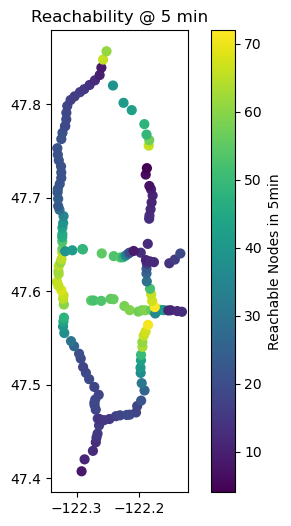

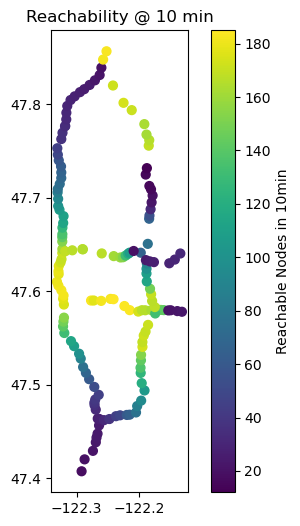

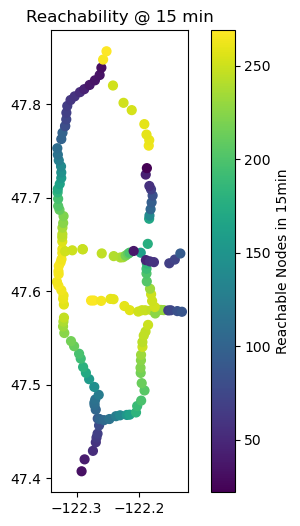

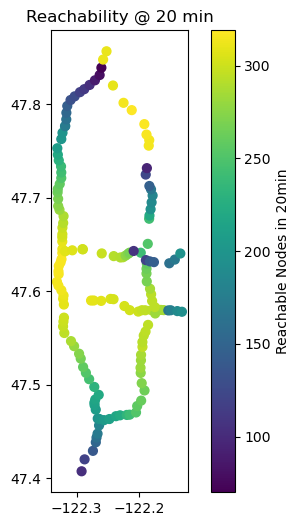

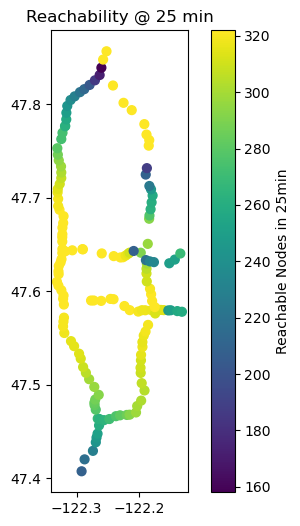

In [44]:
# 1. 准备参数 & 读入文件
thresholds = [5,10,15,20,25]
# 假设 ff[t] 存放的是 (N,N) 的可达矩阵
ff = {
    t: np.load(f"Loop_Seattle_2015_reachability_free_flow_{t}min.npy")
    for t in thresholds
}

# 2. 读节点顺序，nodes 是形如 "d005es15036" 的列表
nodes_df = pd.read_csv("nodes_loop_mp_list.csv", dtype=str)
nodes_df.columns = ['idx','orig_id']
nodes_df['orig_id'] = nodes_df['orig_id'].str.strip()
nodes = nodes_df['orig_id'].tolist()

# 3. 计算每个阈值下的可达数
reach_counts = {}
for t in thresholds:
    arr = ff[t]
    if arr.shape[0] != arr.shape[1] or arr.shape[0] != len(nodes):
        raise ValueError("矩阵维度和节点数不匹配")
    reach_counts[t] = arr.sum(axis=1) - 1  # 去掉自身

# 4. 把结果转换为 DataFrame，index 就是 orig_id 列
df_cnt = pd.DataFrame(reach_counts, index=nodes)
print("df_cnt 示例：")
print(df_cnt.head())

# 5. 读 Cab 位置信息，并生成 CabKey 以便 merge
cab = pd.read_csv("Cabinet Location Information.csv", dtype=str)
cab = cab.rename(columns={cab.columns[0]:'CabName'})[['CabName','Lat','Lon']]
cab['CabKey'] = cab['CabName'].str.strip().str.lower()

# 6. nodes_df 生成同样的 CabKey
nodes_df['CabKey'] = nodes_df['orig_id'].str.lstrip('d').str.lower()

# 7. 合并出带经纬度的基表_df_nodes_base
df_nodes_base = nodes_df.merge(
    cab[['CabKey','Lat','Lon']], 
    on='CabKey', how='left'
).dropna(subset=['Lat','Lon']).copy()
df_nodes_base['Lat'] = df_nodes_base['Lat'].astype(float)
df_nodes_base['Lon'] = df_nodes_base['Lon'].astype(float)

# 8. 构造 GeoDataFrame 基架（不含 reach）
gdf_base = gpd.GeoDataFrame(
    df_nodes_base,
    geometry=[Point(x,y) for x,y in zip(df_nodes_base.Lon, df_nodes_base.Lat)],
    crs="EPSG:4326"
)

# 9. 循环五个阈值，画图并保存
for t in thresholds:
    gdf = gdf_base.copy()
    # 一定要保证 loc 用的 index 在 df_cnt.index 里
    gdf['reach'] = df_cnt.loc[gdf['orig_id'], t].values
    
    fig, ax = plt.subplots(figsize=(6,6))
    gdf.plot(
        'reach', cmap='viridis', markersize=40,
        legend=True, ax=ax,
        legend_kwds={'label':f"Reachable Nodes in {t}min"}
    )
    ax.set_title(f"Reachability @ {t} min")
    # 设置经纬度范围
    lon0, lon1 = df_nodes_base.Lon.min(), df_nodes_base.Lon.max()
    lat0, lat1 = df_nodes_base.Lat.min(), df_nodes_base.Lat.max()
    pad_lon = (lon1-lon0)*0.05; pad_lat = (lat1-lat0)*0.05
    ax.set_xlim(lon0-pad_lon, lon1+pad_lon)
    ax.set_ylim(lat0-pad_lat, lat1+pad_lat)
    
    fn = f"reachability_map_{t}min.png"
    plt.show()


